In [53]:
import torch
from sentence_transformers import SentenceTransformer
import os
import pandas as pd
from tqdm import tqdm
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import numpy as np

In [54]:
model = SentenceTransformer('paraphrase-multilingual-mpnet-base-v2')
model

SentenceTransformer(
  (0): Transformer({'max_seq_length': 128, 'do_lower_case': False}) with Transformer model: XLMRobertaModel 
  (1): Pooling({'word_embedding_dimension': 768, 'pooling_mode_cls_token': False, 'pooling_mode_mean_tokens': True, 'pooling_mode_max_tokens': False, 'pooling_mode_mean_sqrt_len_tokens': False})
)

In [55]:
path = "/nas/staff/data_work/AG/BIRDS/bird_descriptions"
filenames = sorted(os.listdir(path))

data = {'species': [], 'embedding': []}


df = pd.DataFrame(columns=['species'] + [f'{i}' for i in range(768)])

for i, fn in tqdm(enumerate(filenames)):
    with open(os.path.join(path, fn), 'r') as f:
        content = f.read()
    
    class_embedding = model.encode(content)
    # data['species'].append(fn.split('.')[0])
    # data['embedding'].append(class_embedding)

    df.loc[i] = [fn.split('.')[0]] + list(class_embedding)
    
df


95it [00:36,  2.62it/s]


,species,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,Accipiter_gentilis,0.121166,0.085648,-0.007167,-0.055042,-0.041594,-0.035632,-0.093391,-0.011470,-0.189952,...,0.016346,-0.014814,-0.008542,-0.127543,0.006885,-0.114815,0.031983,0.143212,-0.049795,-0.055573
1,Acrocephalus_palustris,-0.043628,-0.032293,-0.006059,0.028814,-0.081530,-0.068613,-0.098198,-0.033475,-0.166977,...,-0.042898,0.015521,0.050520,-0.071208,0.055254,0.107910,0.027103,0.052694,0.006323,-0.099270
2,Acrocephalus_scirpaceus,0.059420,-0.558394,-0.007199,0.008183,-0.015796,-0.016576,-0.152016,-0.015388,-0.105477,...,-0.008938,0.056429,-0.089760,0.008420,0.034643,0.290877,-0.039916,0.050825,-0.098896,-0.081888
3,Aegithalos_caudatus,0.003391,-0.527975,-0.007943,0.051533,0.046456,0.004846,-0.170643,-0.019593,-0.136529,...,-0.086328,0.016089,-0.064229,-0.034817,0.119778,0.157944,0.078513,0.115388,0.057641,-0.023453
4,Alauda_arvensis,-0.040415,-0.317138,-0.007473,0.066759,0.067032,-0.045402,-0.221973,-0.080564,-0.139116,...,-0.088646,-0.036838,-0.132598,0.000410,0.059765,0.401097,0.036471,-0.063801,-0.076746,-0.078151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Turdus_merula,-0.059126,-0.234947,-0.004833,0.060185,0.019894,-0.036142,-0.156406,-0.041747,-0.015237,...,0.001023,-0.027344,-0.094172,-0.034322,0.064400,0.238302,0.044992,0.102610,-0.005987,-0.065067
91,Turdus_philomelos,-0.062010,-0.291574,-0.009090,0.044999,-0.054398,-0.009299,-0.200840,-0.051120,-0.176242,...,-0.142914,-0.043241,0.053327,-0.088804,0.107098,0.149411,-0.050929,0.083434,-0.106223,-0.060427
92,Turdus_pilaris,-0.041867,0.037046,-0.009187,-0.007535,-0.016281,-0.047873,-0.168186,0.015289,-0.186447,...,0.017125,0.031187,0.033904,-0.032914,0.079078,0.010746,0.000961,0.022664,0.076672,-0.036853
93,Turdus_viscivorus,-0.003713,-0.117509,-0.008019,0.088329,-0.093948,-0.086296,-0.204614,-0.027289,-0.244256,...,-0.016879,-0.047633,0.008690,-0.000972,0.067474,0.205394,-0.043352,0.022340,-0.058671,-0.018821


In [15]:
# df.to_csv("/nas/staff/data_work/AG/BIRDS/baseline_embeddings/sbert_embeddings.csv", index=None)

In [56]:
pairwise_distances_sbert = cdist(df.iloc[:, 1:], df.iloc[:, 1:], metric='euclidean')

# dot
pairwise_dot_prod_sbert = np.dot(df.iloc[:, 1:], df.iloc[:, 1:].T)

# cosine sim
pairwise_cosine_similarities_sbert = np.dot(df.iloc[:, 1:], df.iloc[:, 1:].T)
pairwise_cosine_similarities_sbert /= np.linalg.norm(df.iloc[:, 1:], axis=1, keepdims=True)
pairwise_cosine_similarities_sbert /= np.linalg.norm(df.iloc[:, 1:], axis=1, keepdims=True).T

pairwise_cosine_similarities_sbert.mean()

0.5889994

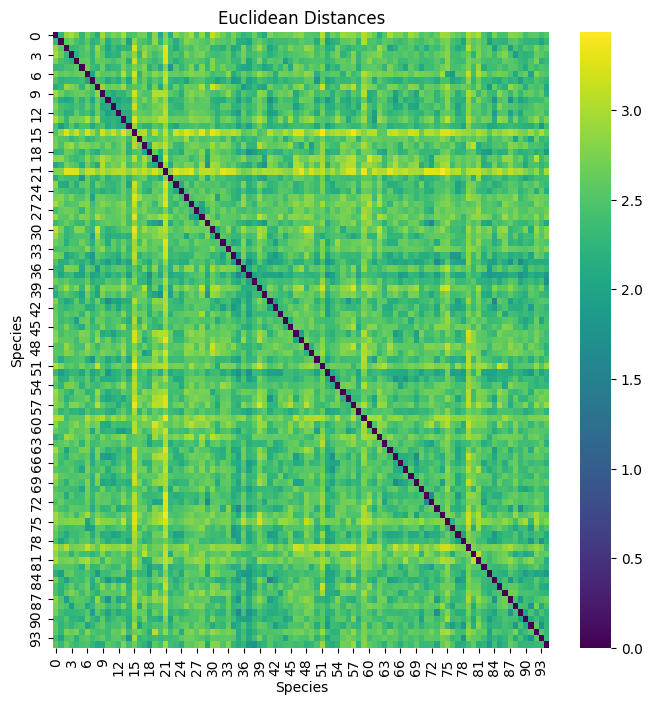

In [12]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_distances_sbert, cmap='viridis', annot=False)
plt.title("Euclidean Distances")
plt.xlabel("Species")
plt.ylabel("Species")
plt.show()

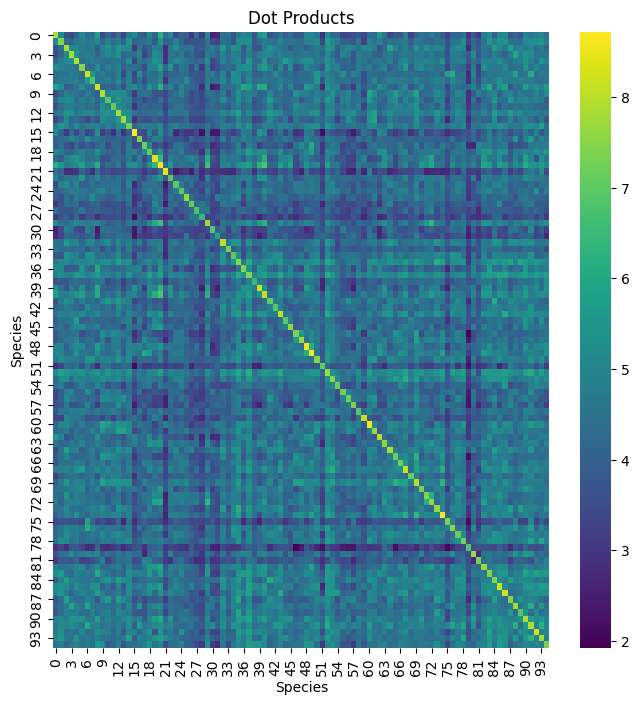

In [13]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_dot_prod_sbert, cmap='viridis', annot=False)
plt.title("Dot Products")
plt.xlabel("Species")
plt.ylabel("Species")
plt.show()

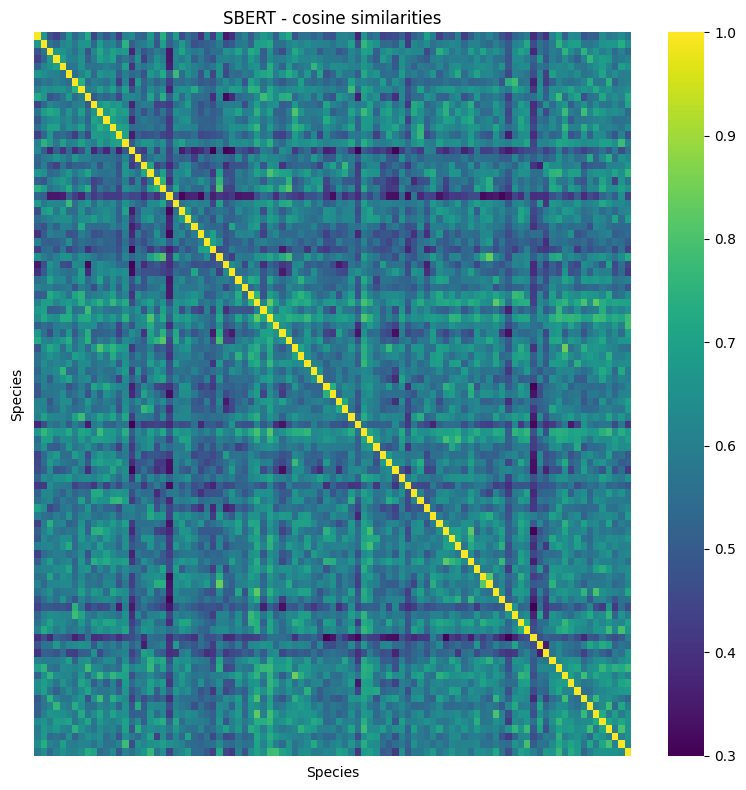

In [18]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_cosine_similarities_sbert, cmap='viridis', annot=False, vmin=0.3)
plt.title("SBERT - cosine similarities")
plt.xlabel("Species")
plt.ylabel("Species")
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig("/nas/staff/data_work/AG/BIRDS/plots/sbert_cosineSimilarities.pdf")
plt.show()

### BERT

In [57]:
bert_embeddings = pd.read_csv("/nas/staff/data_work/Andreas/HearTheSpecies/bird-recognition/bird-description-fusion/bert_embeddings.csv")
bert_embeddings.head(5)

,species,0,1,2,3,4,5,6,7,8,...,758,759,760,761,762,763,764,765,766,767
0,Troglodytes_troglodytes,-0.231768,0.027186,0.188077,-0.300417,0.076101,0.213679,0.174857,0.297003,-0.036047,...,0.011814,-0.087742,-0.120384,-0.078826,-0.283165,-0.329197,-0.275958,0.013146,-0.020073,0.212726
1,Turdus_viscivorus,-0.105483,0.006111,0.292298,-0.260938,0.122524,0.268451,0.323992,0.281129,0.000287,...,0.235832,-0.008703,-0.156101,-0.164300,-0.074955,-0.527045,-0.193321,0.058549,0.104908,0.050563
2,Phylloscopus_bonelli,-0.111742,0.065111,0.273551,-0.403131,-0.007583,0.397938,0.181838,0.439934,-0.105533,...,0.047802,-0.080105,-0.057763,0.008251,-0.127376,-0.295480,-0.396703,0.089772,-0.098209,0.196875
3,Corvus_corone_cornix,-0.015775,0.322415,0.317090,-0.443375,0.191536,0.129503,0.302817,0.397829,-0.028889,...,0.016456,0.066050,-0.219639,-0.085050,-0.265159,-0.270885,-0.273595,-0.008645,0.084826,-0.163905
4,Passer_domesticus,0.242839,0.235229,0.413376,-0.417893,0.134982,0.154841,0.377876,0.554023,-0.125865,...,0.068294,-0.047484,-0.050286,-0.076989,-0.094191,-0.434080,-0.361399,0.125101,0.111963,0.217210


In [39]:
# test stuff :P
import torch

# temp_emb = torch.tensor(bert_embeddings.iloc[:, 1:])
temp_emb = bert_embeddings.iloc[:, 1:]
temp_emb = torch.tensor(temp_emb.values)
print(temp_emb.shape)

norms = torch.linalg.norm(temp_emb, dim=(-2), keepdim=True)
norms.shape

torch.Size([95, 768])


torch.Size([1, 768])

In [41]:
z = temp_emb / norms
z.shape

torch.Size([95, 768])

In [8]:
pairwise_distances = cdist(bert_embeddings.iloc[:, 1:], bert_embeddings.iloc[:, 1:], metric='euclidean')

# dot
pairwise_dot_prod = np.dot(bert_embeddings.iloc[:, 1:], bert_embeddings.iloc[:, 1:].T)

# cosine sim
pairwise_cosine_similarities = np.dot(bert_embeddings.iloc[:, 1:], bert_embeddings.iloc[:, 1:].T)
pairwise_cosine_similarities /= np.linalg.norm(bert_embeddings.iloc[:, 1:], axis=1, keepdims=True)
pairwise_cosine_similarities /= np.linalg.norm(bert_embeddings.iloc[:, 1:], axis=1, keepdims=True).T

pairwise_cosine_similarities.mean()

0.9003504685782271

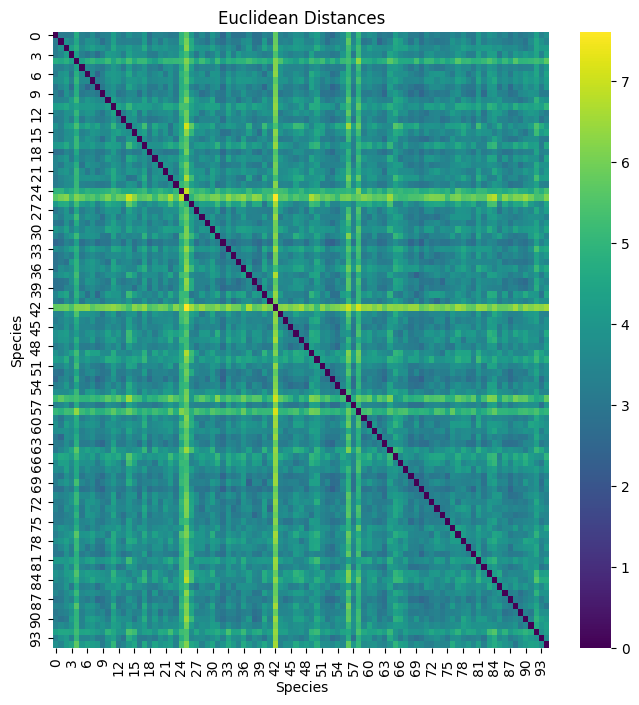

In [18]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_distances, cmap='viridis', annot=False)
plt.title("Euclidean Distances")
plt.xlabel("Species")
plt.ylabel("Species")
plt.show()

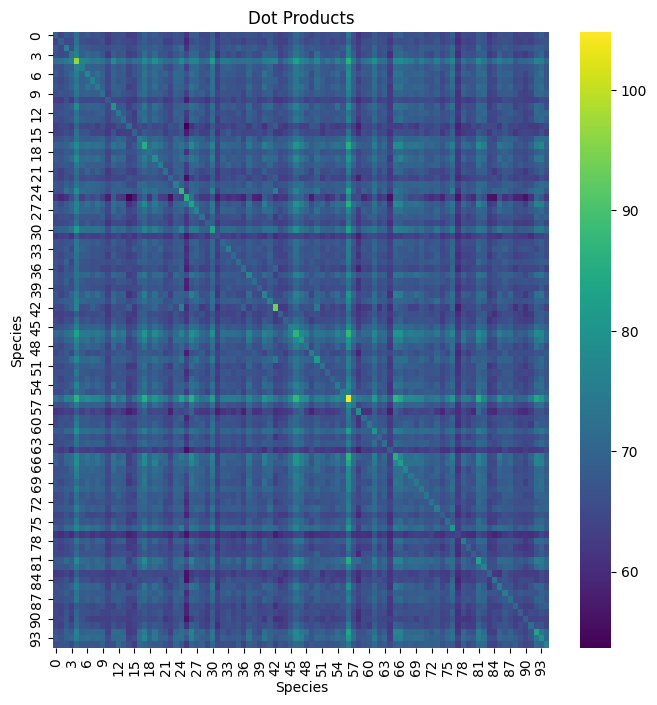

In [19]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_dot_prod, cmap='viridis', annot=False)
plt.title("Dot Products")
plt.xlabel("Species")
plt.ylabel("Species")
plt.show()

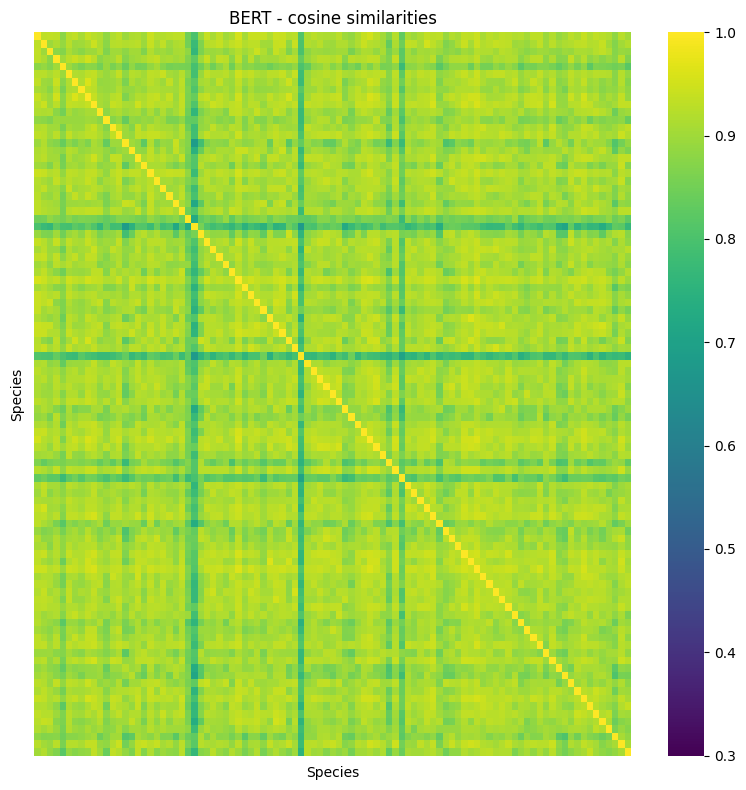

In [12]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_cosine_similarities, cmap='viridis', annot=False, vmin=0.3)
plt.title("BERT - cosine similarities")
plt.xlabel("Species")
plt.ylabel("Species")
plt.xticks([], [])
plt.yticks([], [])
plt.tight_layout()
plt.savefig("/nas/staff/data_work/AG/BIRDS/plots/bert_cosineSimilarities.pdf")
plt.show()

### Test smaller SBERT model 

In [21]:
model_mini = SentenceTransformer('all-MiniLM-L6-v2')
model_mini

path = "/nas/staff/data_work/AG/BIRDS/bird_descriptions"
filenames = sorted(os.listdir(path))

data = {'species': [], 'embedding': []}


df = pd.DataFrame(columns=['species'] + [f'{i}' for i in range(384)])

for i, fn in tqdm(enumerate(filenames)):
    with open(os.path.join(path, fn), 'r') as f:
        content = f.read()
    
    class_embedding = model_mini.encode(content)
    df.loc[i] = [fn.split('.')[0]] + list(class_embedding)
    
df

95it [00:07, 12.56it/s]


,species,0,1,2,3,4,5,6,7,8,...,374,375,376,377,378,379,380,381,382,383
0,Accipiter_gentilis,-0.034281,-0.031705,0.037438,-0.009229,-0.066327,-0.013690,0.073507,-0.126750,0.046130,...,-0.010332,0.041320,-0.026927,-0.054956,0.029944,0.018387,0.069438,0.035499,-0.011249,0.040236
1,Acrocephalus_palustris,-0.060100,-0.113368,0.001046,-0.023169,-0.093725,0.029002,0.093187,-0.143898,0.041581,...,-0.032972,0.107050,-0.063955,0.005132,-0.009094,0.001680,0.052194,0.003572,-0.001135,0.071956
2,Acrocephalus_scirpaceus,-0.036614,-0.049324,0.009207,-0.044411,-0.124456,-0.006548,0.113045,-0.045186,0.090723,...,0.010345,0.120695,-0.025626,0.046766,-0.050717,0.014979,-0.000823,0.005286,-0.010393,-0.001057
3,Aegithalos_caudatus,-0.024761,-0.071071,0.004858,-0.037363,-0.092420,-0.009999,0.139228,-0.005951,0.021881,...,-0.000231,0.022994,-0.032843,0.054304,-0.020576,-0.008418,0.073285,0.076067,0.007824,0.053394
4,Alauda_arvensis,-0.037647,0.012087,0.076165,-0.026195,-0.031633,0.025816,0.082883,-0.030251,0.020252,...,-0.014543,0.109773,-0.065607,0.002532,-0.031133,-0.035180,0.027046,0.003116,0.025656,0.016649
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90,Turdus_merula,-0.020584,-0.081232,0.008204,-0.001530,-0.041726,-0.046392,0.119739,0.004507,0.064335,...,-0.005202,0.045809,-0.034051,0.036492,-0.033063,-0.011492,0.152326,-0.034942,0.003771,0.001856
91,Turdus_philomelos,-0.013503,-0.063959,0.018611,-0.048328,-0.106155,-0.023320,0.163192,-0.077062,0.049019,...,0.028262,0.070707,-0.020619,-0.015935,-0.024920,0.047247,0.063625,0.050565,-0.005315,-0.004940
92,Turdus_pilaris,0.038310,-0.065854,0.003783,0.022115,0.012811,-0.011292,0.073479,-0.142435,-0.006313,...,0.055677,0.008263,-0.043838,0.049263,0.063503,0.039501,0.063334,0.098011,-0.041599,0.020697
93,Turdus_viscivorus,-0.011430,-0.015867,0.008511,-0.032936,-0.061006,-0.029396,0.150176,-0.040510,0.046007,...,-0.018768,0.040160,-0.013470,0.044994,-0.023726,0.016360,0.035725,-0.020946,-0.008421,-0.013567


In [22]:
pairwise_distances = cdist(df.iloc[:, 1:], df.iloc[:, 1:], metric='euclidean')

# dot
pairwise_dot_prod = np.dot(df.iloc[:, 1:], df.iloc[:, 1:].T)

# cosine sim
pairwise_cosine_similarities = np.dot(df.iloc[:, 1:], df.iloc[:, 1:].T)
pairwise_cosine_similarities /= np.linalg.norm(df.iloc[:, 1:], axis=1, keepdims=True)
pairwise_cosine_similarities /= np.linalg.norm(df.iloc[:, 1:], axis=1, keepdims=True).T

pairwise_cosine_similarities.mean()

0.49736756

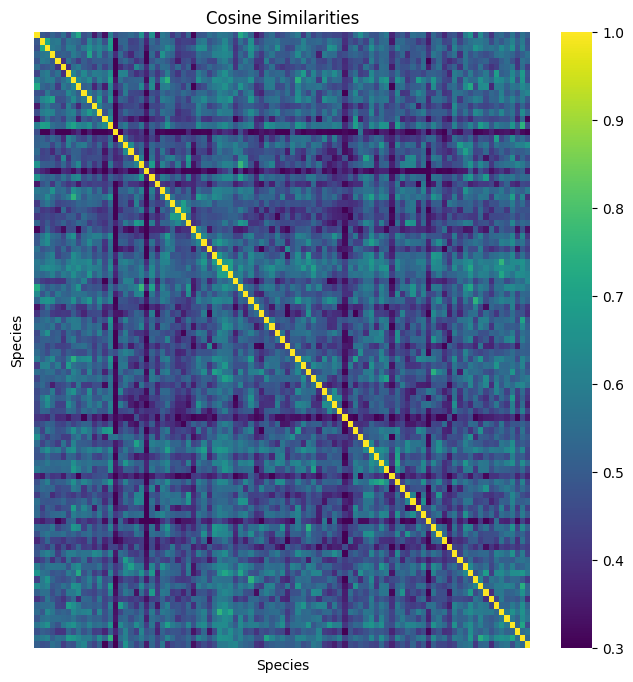

In [42]:
# Create a heatmap using Seaborn
plt.figure(figsize=(8, 8))
sns.heatmap(pairwise_cosine_similarities, cmap='viridis', annot=False, vmin=0.3)
plt.title("Cosine Similarities")
plt.xticks([], [])
plt.yticks([], [])
plt.xlabel("Species")
plt.ylabel("Species")
plt.show()

In [13]:
df.to_csv("/nas/staff/data_work/AG/BIRDS/baseline_embeddings/sbert_small_embeddings.csv", index=None)

### Concatenate Embeddings

In [36]:
from sklearn import  preprocessing

bert_path = "/nas/staff/data_work/AG/BIRDS/baseline_embeddings/bert_embeddings.csv"
avonet_path = "/nas/staff/data_work/AG/BIRDS/baseline_embeddings/avonet_embeddings.csv"
dryad_path = "/nas/staff/data_work/AG/BIRDS/baseline_embeddings/history_embeddings.csv"

bert_embeddings = pd.read_csv(bert_path)
avonet_embeddings = pd.read_csv(avonet_path)
dryad_embeddings = pd.read_csv(dryad_path)

In [37]:
for col in set(avonet_embeddings.columns) - set(['species']):
    if type(avonet_embeddings[col].iloc[0]) != np.float64 and type(avonet_embeddings[col].iloc[0]) != np.int64:
        # avonet_embeddings[col] = avonet_embeddings[col].astype(int)
        print(col)
avonet_embeddings.head(5)

,species,Beak.Length_Culmen,Beak.Length_Nares,Beak.Width,Beak.Depth,Tarsus.Length,Wing.Length,Kipps.Distance,Secondary1,Hand-Wing.Index,Tail.Length,Mass,Mass.Source,Inference,Habitat,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle
0,accipiter gentilis,33.7,19.6,11.6,18.0,67.3,337.6,122.6,215.0,36.3,241.1,866.04,0,0,0,1,2.0,0,5,1
1,buteo buteo,35.9,22.1,12.6,16.6,75.8,382.9,147.2,236.9,38.3,214.4,759.10,0,0,1,3,2.0,0,5,2
2,milvus migrans,40.0,22.4,13.0,17.4,51.4,457.4,219.9,237.5,48.1,269.5,734.10,0,0,6,3,3.0,2,4,0
3,milvus milvus,40.2,26.6,13.2,18.7,52.9,481.5,241.6,241.6,49.9,317.3,1071.77,0,0,4,2,2.0,2,4,1
4,pernis apivorus,34.8,19.1,11.7,13.7,43.9,407.4,154.2,253.0,37.9,253.2,754.37,0,0,0,1,3.0,0,3,2


In [38]:
# Normalise based on rows
# min_values = avonet_embeddings.iloc[:, 1:].min(axis=1)
# max_values = avonet_embeddings.iloc[:, 1:].max(axis=1)
# avonet_embeddings.iloc[:, 1:] = (avonet_embeddings.iloc[:, 1:] - min_values[:, None]) / (max_values[:, None] - min_values[:, None])

# Normalise based on columns
min_max_scaler = preprocessing.MinMaxScaler()
avonet_embeddings.iloc[:, 1:] = min_max_scaler.fit_transform(avonet_embeddings.iloc[:, 1:])

# min_values = avonet_embeddings.iloc[:, 1:].min(axis=0)
# max_values = avonet_embeddings.iloc[:, 1:].max(axis=0)
# avonet_embeddings.iloc[:, 1:] = (avonet_embeddings.iloc[:, 1:] - min_values) / (max_values - min_values)
# avonet_embeddings.head(5)

/tmp/ipykernel_2884233/4196710389.py:8: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  avonet_embeddings.iloc[:, 1:] = min_max_scaler.fit_transform(avonet_embeddings.iloc[:, 1:])


In [41]:
avonet_embeddings.head(5)

,species,Beak.Length_Culmen,Beak.Length_Nares,Beak.Width,Beak.Depth,Tarsus.Length,Wing.Length,Kipps.Distance,Secondary1,Hand-Wing.Index,Tail.Length,Mass,Mass.Source,Inference,Habitat,Habitat.Density,Migration,Trophic.Level,Trophic.Niche,Primary.Lifestyle
0,accipiter gentilis,0.143802,0.103217,0.446512,0.512903,0.246279,0.559079,0.455265,0.655017,0.583569,0.502266,0.156613,0.0,0.0,0.000000,0.0,0.5,0.0,1.0,0.333333
1,buteo buteo,0.155923,0.119973,0.493023,0.467742,0.284619,0.646683,0.552652,0.737317,0.640227,0.438588,0.137149,0.0,0.0,0.166667,1.0,0.5,0.0,1.0,0.666667
2,milvus migrans,0.178512,0.121984,0.511628,0.493548,0.174560,0.790756,0.840459,0.739572,0.917847,0.569998,0.132599,0.0,0.0,1.000000,1.0,1.0,1.0,0.8,0.000000
3,milvus milvus,0.179614,0.150134,0.520930,0.535484,0.181326,0.837362,0.926366,0.754979,0.968839,0.683997,0.194056,0.0,0.0,0.666667,0.5,0.5,1.0,0.8,0.333333
4,pernis apivorus,0.149862,0.099866,0.451163,0.374194,0.140731,0.694063,0.580364,0.797820,0.628895,0.531123,0.136288,0.0,0.0,0.000000,0.0,1.0,0.0,0.6,0.666667


In [42]:
for col in set(dryad_embeddings.columns) - set(['species']):
    if type(dryad_embeddings[col].iloc[0]) != np.float64 and type(dryad_embeddings[col].iloc[0]) != np.int64:
        # dryad_embeddings[col] = dryad_embeddings[col].astype(int)
        print(col)
        print(type(dryad_embeddings[col].iloc[0]), "\n")
dryad_embeddings.head(5)

,species,LengthU_MEAN,WingU_MEAN,WingM_MEAN,WingF_MEAN,TailU_MEAN,TailM_MEAN,TailF_MEAN,BillU_MEAN,BillM_MEAN,...,Omnivore_Y,Folivore_B,Frugivore_B,Granivore_B,Arthropods_B,Other invertebrates_B,Fish_B,Other vertebrates_B,Carrion_B,Omnivore_B
0,accipiter gentilis,55.0,332.5,312.0,353.0,239.5,223.0,256.0,23.50,22.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,buteo buteo,54.0,392.5,387.0,398.0,211.5,208.0,215.0,22.30,21.6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,milvus migrans,57.5,455.5,447.0,464.0,262.0,256.0,268.0,26.05,25.1,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,milvus milvus,63.0,496.5,490.0,503.0,335.0,327.0,343.0,27.55,27.4,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,pernis apivorus,56.0,409.5,404.0,415.0,255.0,251.0,259.0,20.90,20.5,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [43]:
# min_values = dryad_embeddings.iloc[:, 1:].min(axis=1)
# max_values = dryad_embeddings.iloc[:, 1:].max(axis=1)
# dryad_embeddings.iloc[:, 1:] = (dryad_embeddings.iloc[:, 1:] - min_values[:, None]) / (max_values[:, None] - min_values[:, None])

# Normalise based on columns
min_max_scaler = preprocessing.MinMaxScaler()
dryad_embeddings.iloc[:, 1:] = min_max_scaler.fit_transform(dryad_embeddings.iloc[:, 1:])


# min_values = dryad_embeddings.iloc[:, 1:].min(axis=0)
# max_values = dryad_embeddings.iloc[:, 1:].max(axis=0)
# dryad_embeddings.iloc[:, 1:] = (dryad_embeddings.iloc[:, 1:] - min_values) / (max_values - min_values)

In [48]:
dryad_embeddings.isna().values.any()
dryad_embeddings.head(5)

,species,LengthU_MEAN,WingU_MEAN,WingM_MEAN,WingF_MEAN,TailU_MEAN,TailM_MEAN,TailF_MEAN,BillU_MEAN,BillM_MEAN,...,Omnivore_Y,Folivore_B,Frugivore_B,Granivore_B,Arthropods_B,Other invertebrates_B,Fish_B,Other vertebrates_B,Carrion_B,Omnivore_B
0,accipiter gentilis,0.433962,0.540066,0.483171,0.597120,0.592387,0.440736,0.721689,0.103370,0.088950,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,buteo buteo,0.424528,0.653864,0.621115,0.684702,0.512853,0.406214,0.590531,0.095630,0.086488,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,milvus migrans,0.457547,0.773352,0.731470,0.813157,0.656299,0.516686,0.760077,0.119819,0.108033,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
3,milvus milvus,0.509434,0.851114,0.810557,0.889062,0.863656,0.680092,1.000000,0.129495,0.122191,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0
4,pernis apivorus,0.443396,0.686107,0.652382,0.717789,0.636415,0.505178,0.731286,0.086599,0.079717,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [27]:
df_concat = pd.concat([bert_embeddings, avonet_embeddings.drop(columns=['species']), dryad_embeddings.drop(columns=['species'])], axis=1)
df_concat_bertavonet = pd.concat([bert_embeddings, avonet_embeddings.drop(columns=['species'])], axis=1)
df_concat_bertdryad = pd.concat([bert_embeddings, dryad_embeddings.drop(columns=['species'])], axis=1)
df_concat_avonetdryad = pd.concat([avonet_embeddings, dryad_embeddings.drop(columns=['species'])], axis=1)

In [48]:
df_concat.shape

(95, 864)

In [18]:
df_concat.to_csv("/nas/staff/data_work/AG/BIRDS/baseline_embeddings/normalisedColumns_concatenated_embeddings.csv", index=None)
df_concat_bertavonet.to_csv("/nas/staff/data_work/AG/BIRDS/baseline_embeddings/normalisedColumns_concatenated_bertavonet_embeddings.csv", index=None)
df_concat_bertdryad.to_csv("/nas/staff/data_work/AG/BIRDS/baseline_embeddings/normalisedColumns_concatenated_bertdryad_embeddings.csv", index=None)
df_concat_avonetdryad.to_csv("/nas/staff/data_work/AG/BIRDS/baseline_embeddings/normalisedColumns_concatenated_avonetdryad_embeddings.csv", index=None)

In [ ]:
# min_values = text.iloc[:, 1:].min(axis=1)
# max_values = text.iloc[:, 1:].max(axis=1)
# text.iloc[:, 1:] = (text.iloc[:, 1:] - min_values[:, None]) / (max_values[:, None] - min_values[:, None])

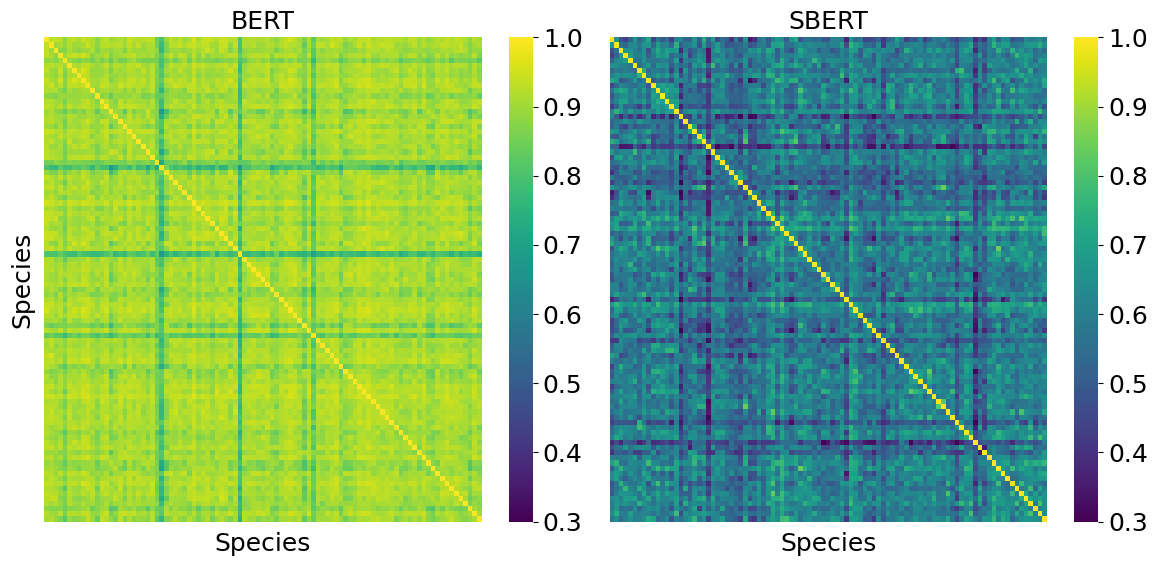

In [78]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharex=True, sharey=True)
# sns.heatmap(pairwise_cosine_similarities, ax=axes[0], cmap='viridis', annot=False, vmin=0.3, cbar=True, cbar_ax=fig.add_axes([0.92, 0.2, 0.02, 0.6]))
sns.heatmap(pairwise_cosine_similarities, ax=axes[0], cmap='viridis', annot=False, vmin=0.3, cbar=True)
axes[0].set_title('BERT', fontsize=18)

# sns.heatmap(pairwise_cosine_similarities_sbert, ax=axes[1], cmap='viridis', annot=False, vmin=0.3, cbar=True, cbar_ax=fig.add_axes([0.92, 0.2, 0.02, 0.6]))
sns.heatmap(pairwise_cosine_similarities_sbert, ax=axes[1], cmap='viridis', annot=False, vmin=0.3, cbar=True)
axes[1].set_title('SBERT', fontsize=18)

axes[0].set_xticks([], [])
axes[1].set_xticks([], [])
axes[0].set_yticks([], [])
axes[1].set_yticks([], [])
axes[0].set_xlabel("Species", fontsize=18)
axes[1].set_xlabel("Species", fontsize=18)
axes[0].set_ylabel("Species", fontsize=18)
# axes[1].set_ylabel("Species")
plt.tight_layout()
plt.savefig('/nas/staff/data_work/AG/BIRDS/plots/heatmaps_cosineSimilarities.pdf')
plt.show()